In [30]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
conn=pyodbc.connect("DRIVER={NetezzaSQL};SERVER=10.5.220.12; PORT=5480;DATABASE=Mercury;UID=bmeka1;PWD=Infy1235%")
cus=conn.cursor()
query="select cast(max(starttime) as varchar(100)),cast(max(endtime) as varchar(100)), cast(max(endtime)-max(starttime) as varchar(100)),cast(to_date(extractdate,'YYYYMMDD')+1 as varchar(100)),to_char(to_date(extractdate,'YYYYMMDD')+1,'DAY') ,package from(select  max(auditdatetime) starttime,NULL endtime  ,extractdate,package from jobs_auditevent where EXTRACTDATE >=20180101 and description ='Package Started' and  upper (package) like'%TRANS%' group by extractdate,package union select  null starttime,max(auditdatetime)  endtime  ,extractdate,package from jobs_auditevent where EXTRACTDATE  >=20180101 and description ='Package Completed' and  upper (package) like'%TRANS%' group by extractdate,package) a  where to_char(to_date(extractdate,'YYYYMMDD')+1,'DAY') in ('MONDAY','THURSDAY') group by 4,5,6 order by package,1"
cus.execute(query)
recs=cus.fetchall()
LoadTimes=pd.DataFrame(data=np.array(recs),columns=['START_TIME','END_TIME','TIME_TAKEN','RUN_DATE','RUN_DAY','PROCESS'])

In [31]:
LoadTimes

,START_TIME,END_TIME,TIME_TAKEN,RUN_DATE,RUN_DAY,PROCESS
0,2018-01-04 10:04:49,2018-01-04 11:15:47,01:10:58,2018-01-04,THURSDAY,AALTransLoad
1,2018-01-08 07:39:24,2018-01-08 08:43:57,01:04:33,2018-01-08,MONDAY,AALTransLoad
2,2018-01-11 06:56:56,2018-01-11 07:32:28,00:35:32,2018-01-11,THURSDAY,AALTransLoad
3,2018-01-15 08:51:19,2018-01-15 09:37:09,00:45:50,2018-01-15,MONDAY,AALTransLoad
4,2018-01-18 15:48:34,2018-01-18 16:00:00,00:11:26,2018-01-18,THURSDAY,AALTransLoad
5,2018-01-22 08:00:49,2018-01-22 08:21:22,00:20:33,2018-01-22,MONDAY,AALTransLoad
6,2018-01-25 13:20:29,2018-01-25 13:32:28,00:11:59,2018-01-25,THURSDAY,AALTransLoad
7,2018-01-29 08:15:58,2018-01-29 08:42:36,00:26:38,2018-01-29,MONDAY,AALTransLoad
8,2018-02-01 07:38:46,2018-02-01 07:50:50,00:12:04,2018-02-01,THURSDAY,AALTransLoad
9,2018-02-05 07:22:42,2018-02-05 07:36:30,00:13:48,2018-02-05,MONDAY,AALTransLoad


In [32]:
SubsetLoadTimes=pd.DataFrame(data=LoadTimes.TIME_TAKEN.str.split(':').tolist(),columns=['H','M','S']).astype(int)

In [33]:
SubsetLoadTimes
SubsetLoadTimes['mins']=SubsetLoadTimes['H']*60+SubsetLoadTimes['M']+SubsetLoadTimes['S']/60
SubsetLoadTimes['hours']=SubsetLoadTimes['mins']/60


In [34]:
SubsetLoadTimes

,H,M,S,mins,hours
0,1,10,58,70.966667,1.182778
1,1,4,33,64.550000,1.075833
2,0,35,32,35.533333,0.592222
3,0,45,50,45.833333,0.763889
4,0,11,26,11.433333,0.190556
5,0,20,33,20.550000,0.342500
6,0,11,59,11.983333,0.199722
7,0,26,38,26.633333,0.443889
8,0,12,4,12.066667,0.201111
9,0,13,48,13.800000,0.230000


In [35]:
SubsetLoadTimes[['job','starttime','date']]=LoadTimes[['PROCESS','START_TIME','RUN_DATE']]

In [36]:

SubsetLoadTimes
%matplotlib inline

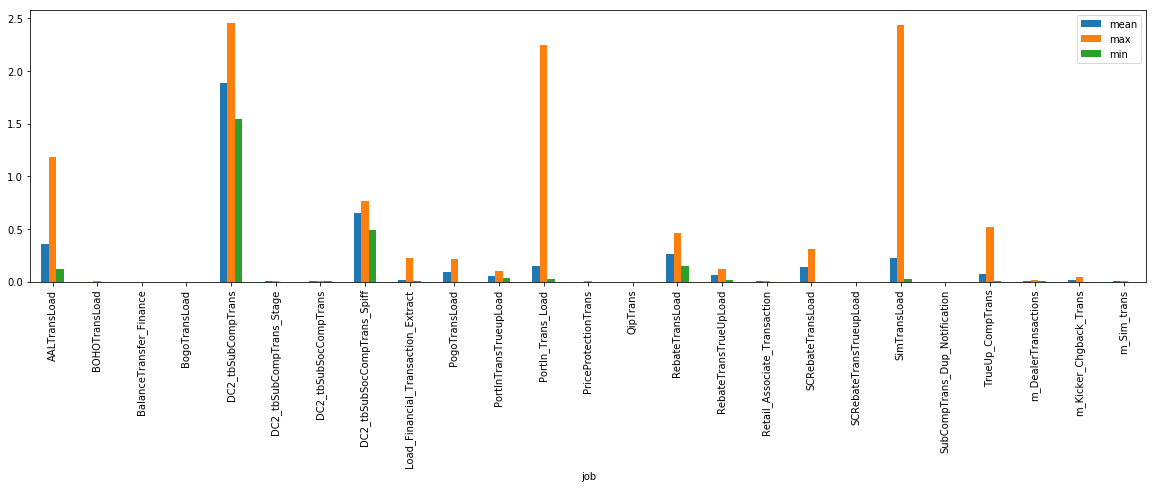

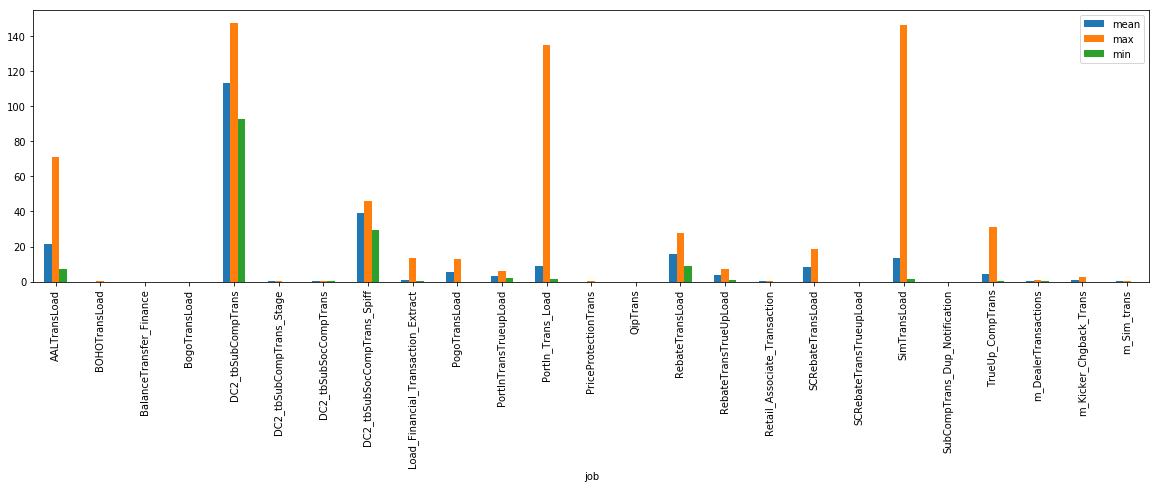

In [52]:

SubsetLoadTimes.groupby('job').hours.agg(['mean','max','min']).plot(kind='bar', figsize=(20,5))
SubsetLoadTimes.groupby('job').mins.agg(['mean','max','min']).plot(kind='bar', figsize=(20,5))

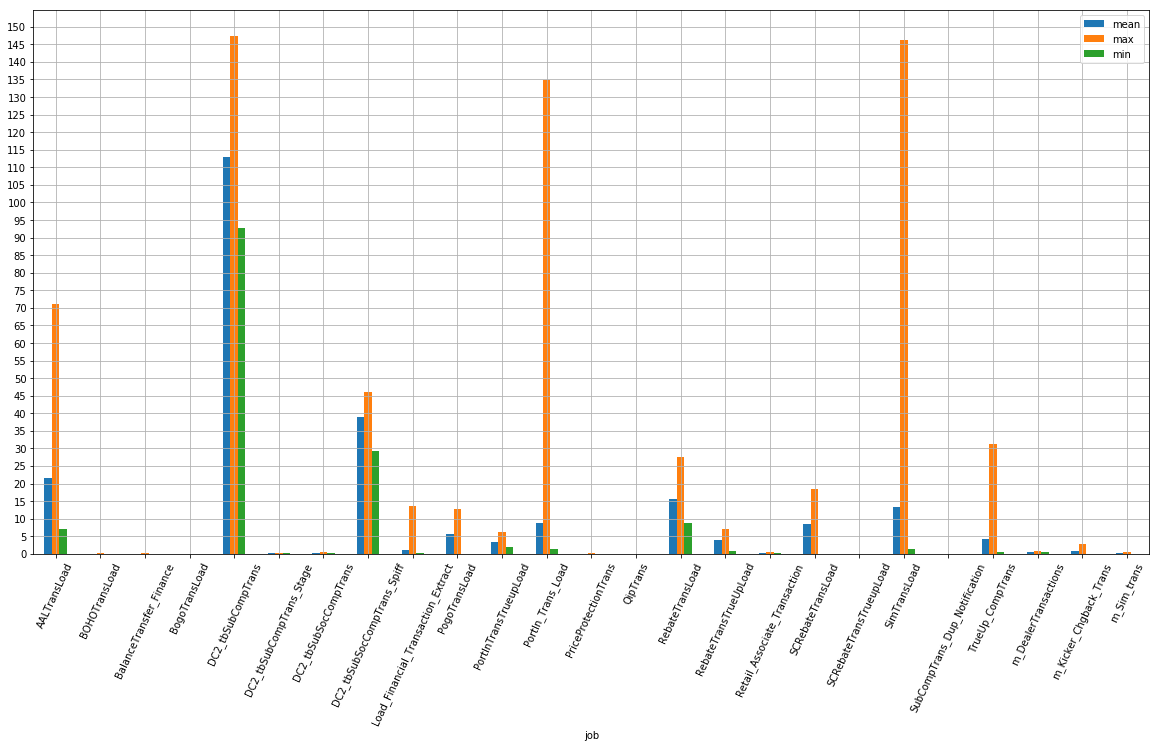

In [56]:
import matplotlib.ticker as plticker
ax=SubsetLoadTimes.groupby('job').mins.agg(['mean','max','min']).plot(kind='bar', figsize=(20,10))
loc = plticker.MultipleLocator(base=5) # this locator puts ticks at regular intervals
ax.yaxis.set_major_locator(loc)
plt.xticks(rotation=65)
plt.grid()

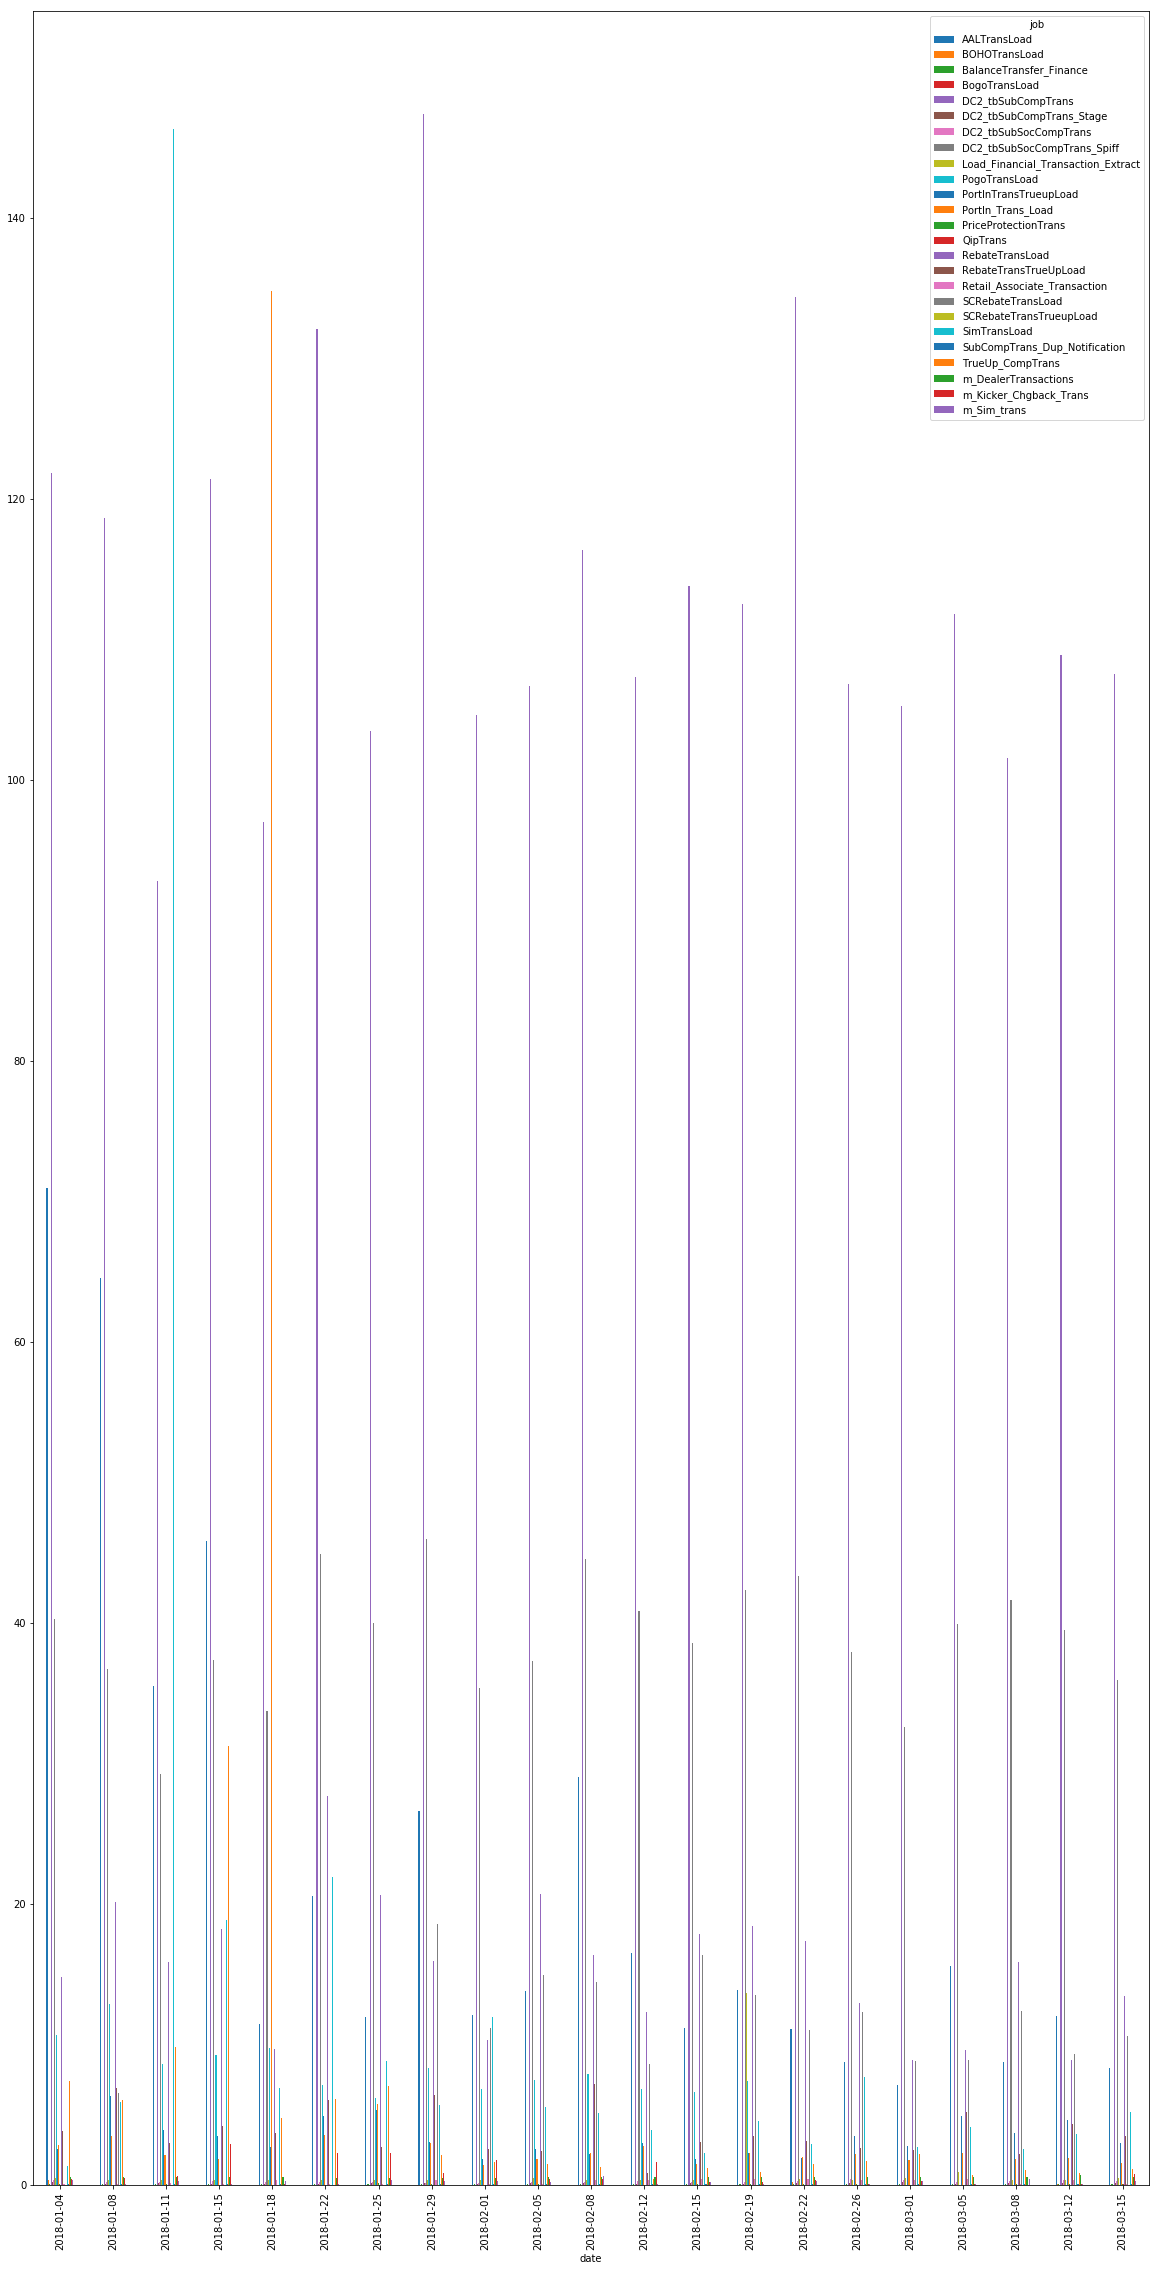

In [75]:
SubsetLoadTimes.pivot(index='date',columns='job',values='mins').plot( kind='bar',figsize=(20,40))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001827D8D0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000002482B588>], dtype=object)

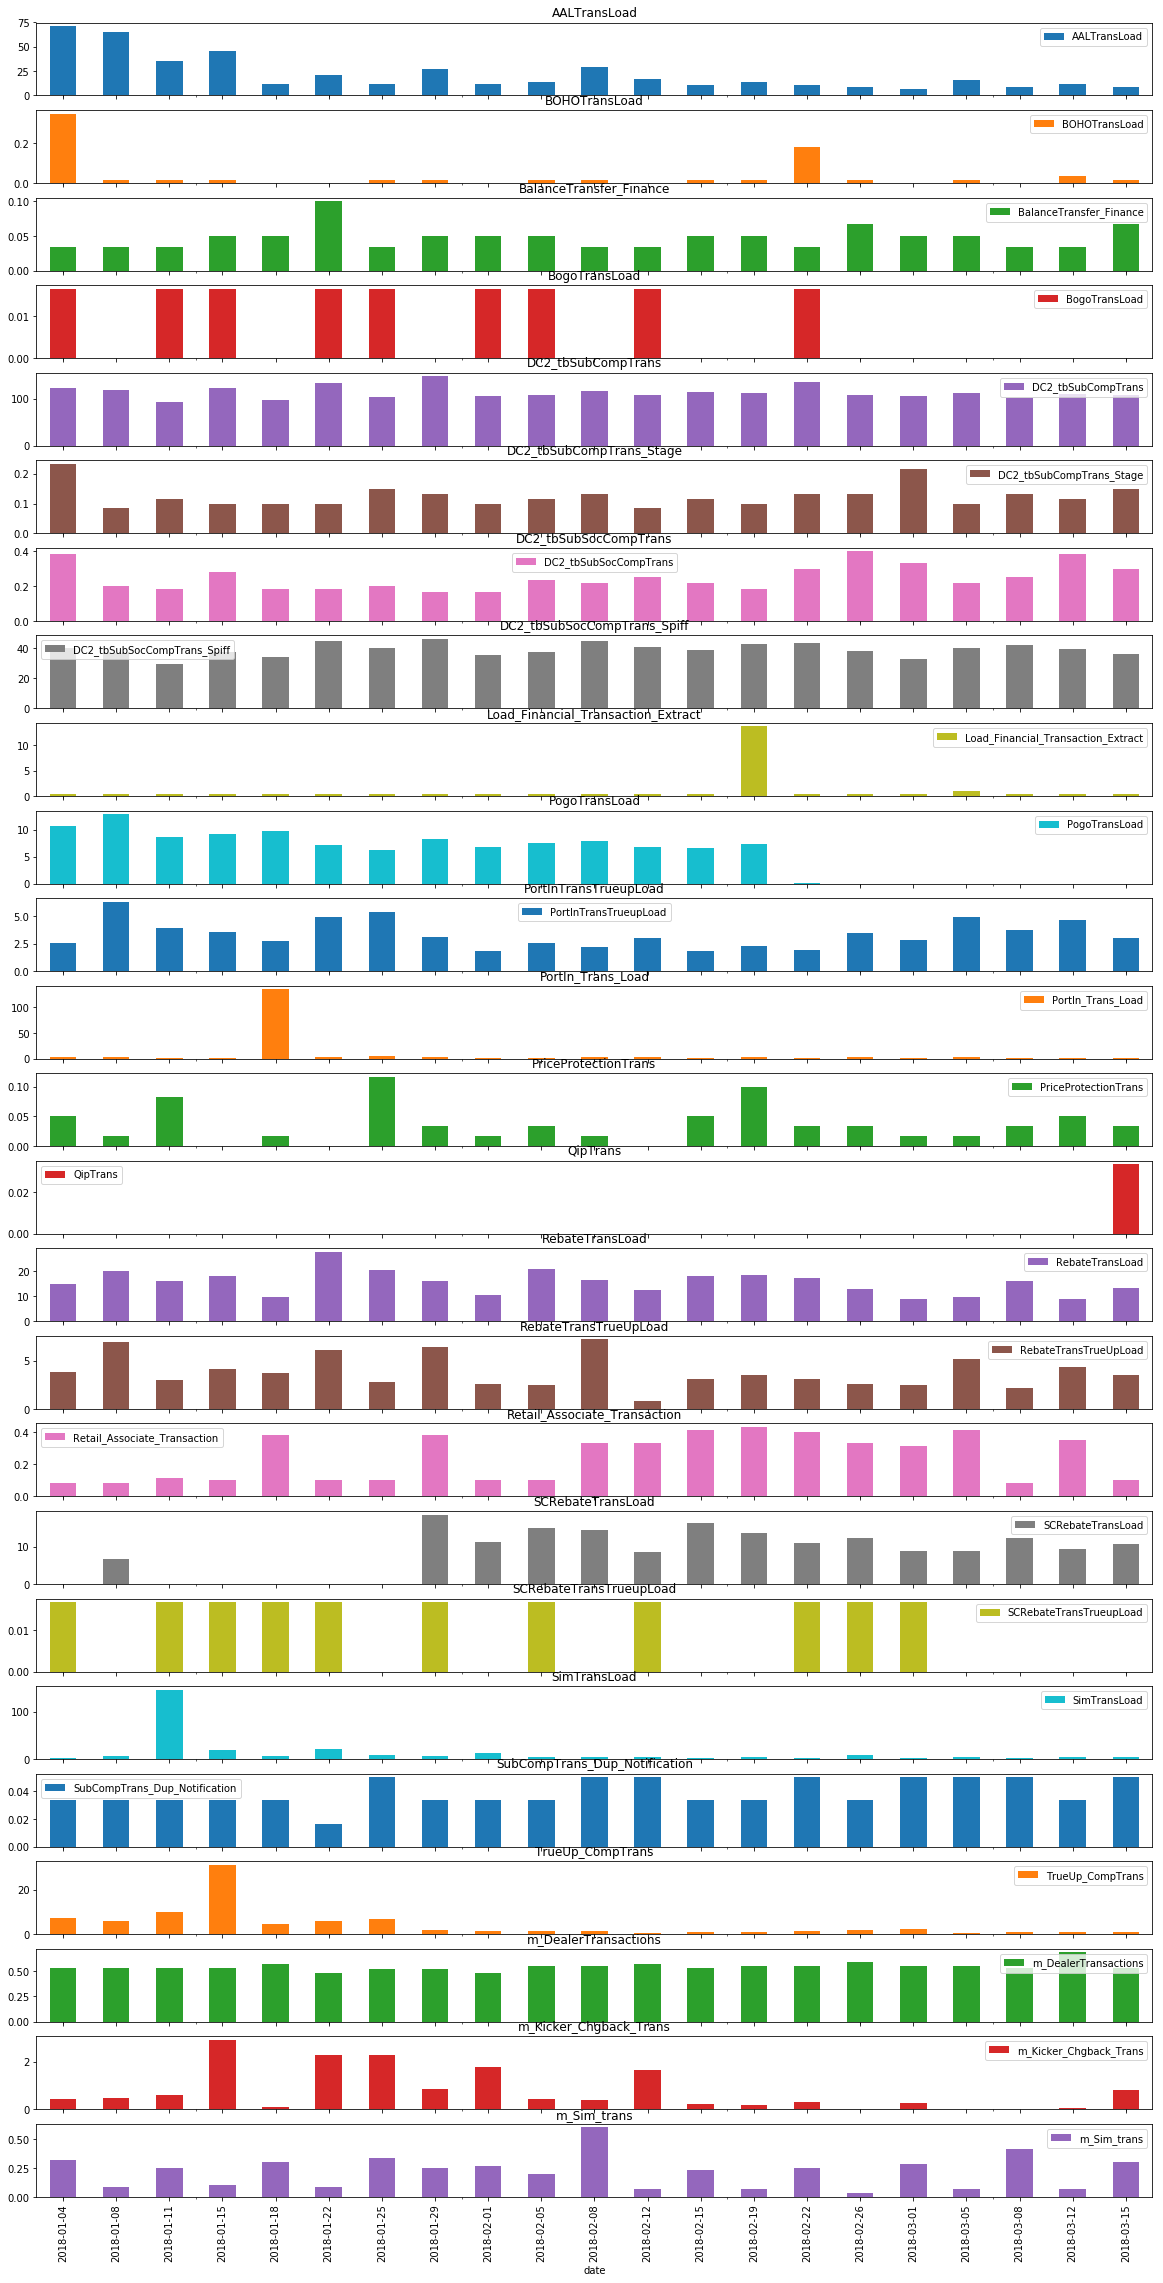

In [64]:
SubsetLoadTimes.pivot(index='date',columns='job',values='mins').plot( kind='bar',figsize=(20,40),subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000002DC0CE80>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000002E9545C0>], dtype=object)

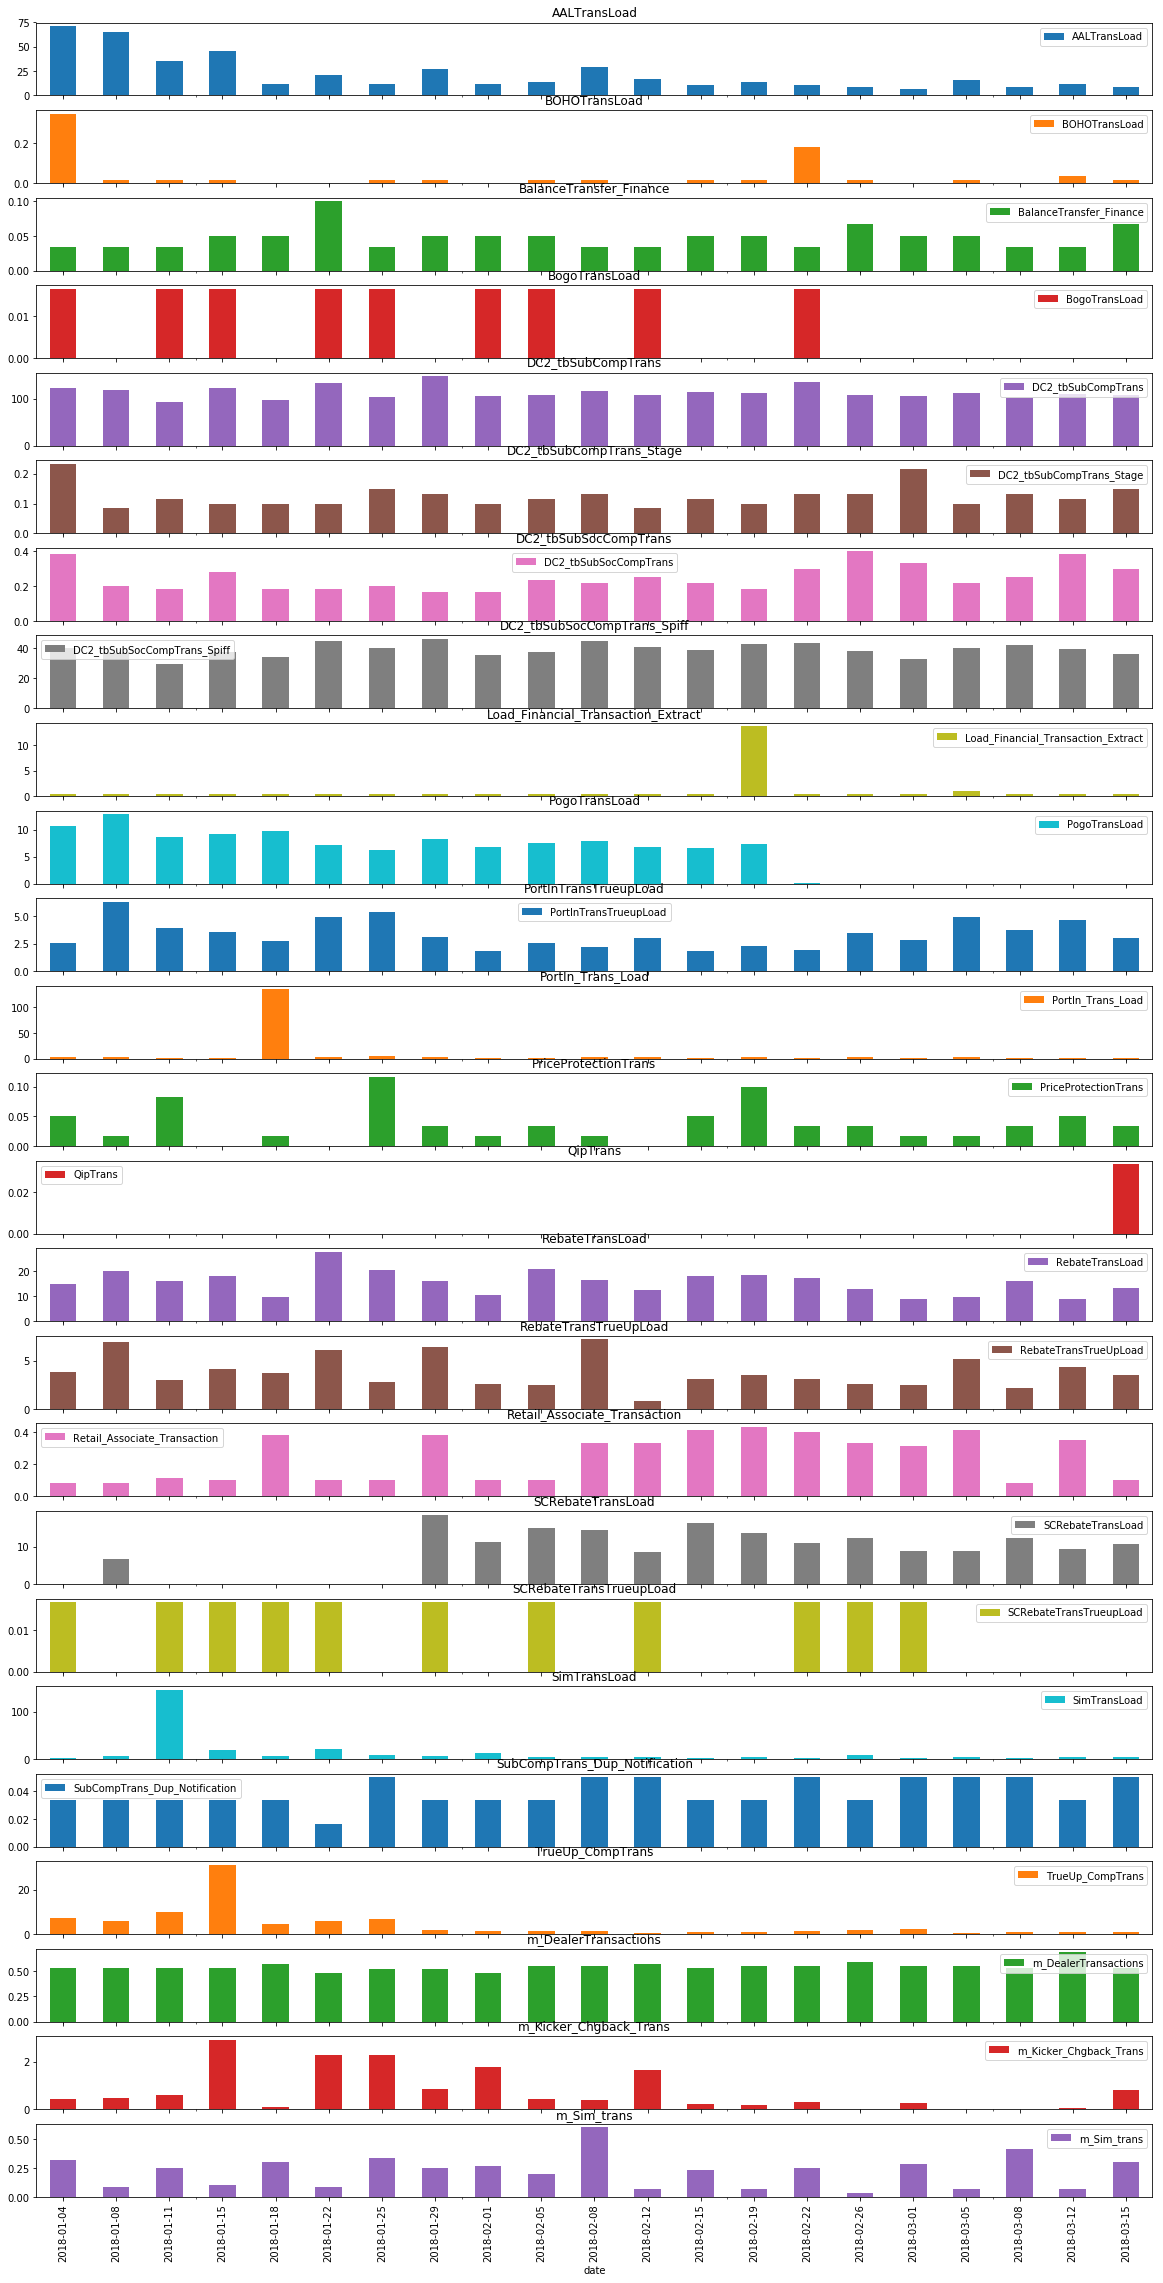

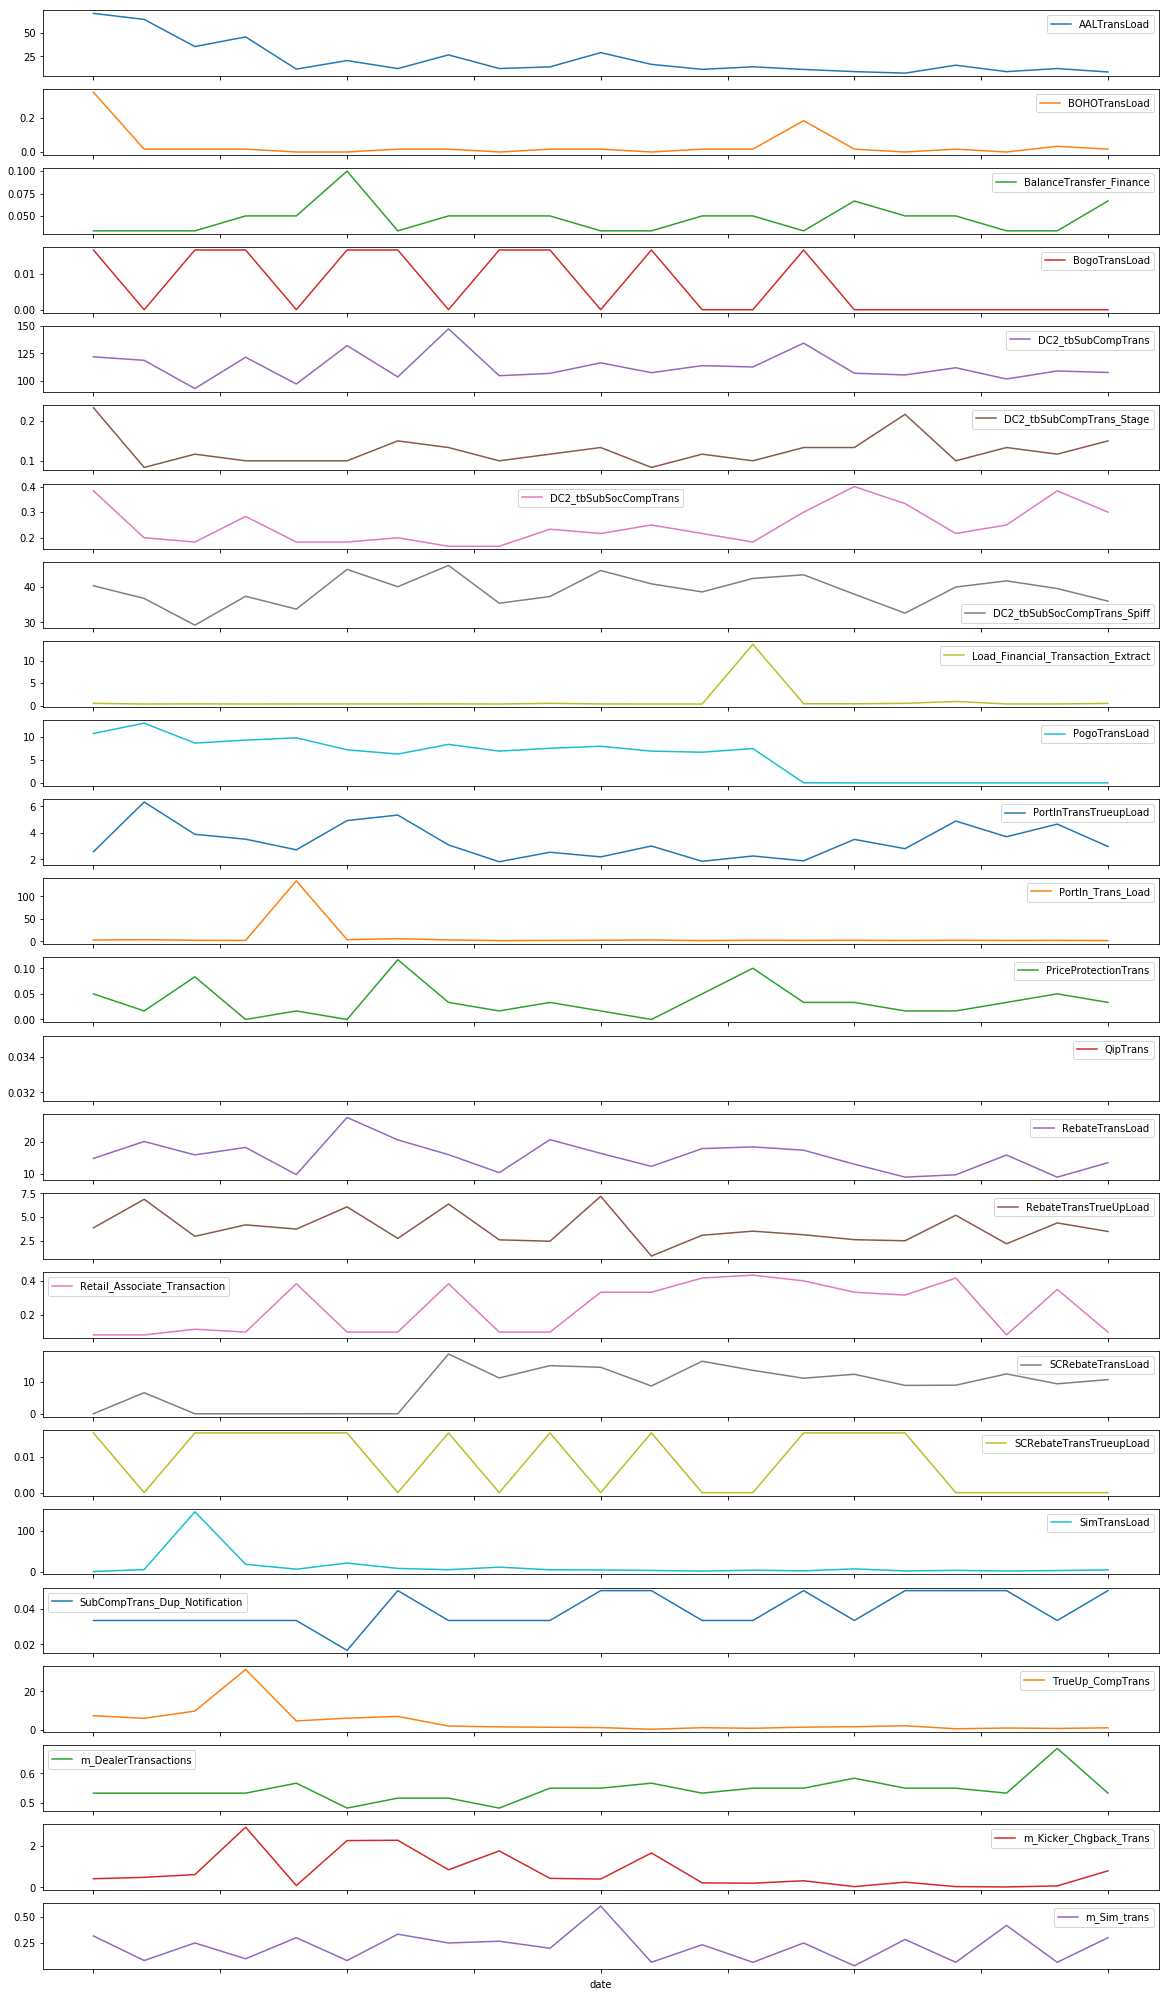

In [77]:
plots=SubsetLoadTimes.pivot(index='date',columns='job',values='mins')
plots.plot( kind='bar',figsize=(20,40),subplots=True)


In [65]:
JobWiseMins=SubsetLoadTimes.pivot(index='date',columns='job',values='mins')

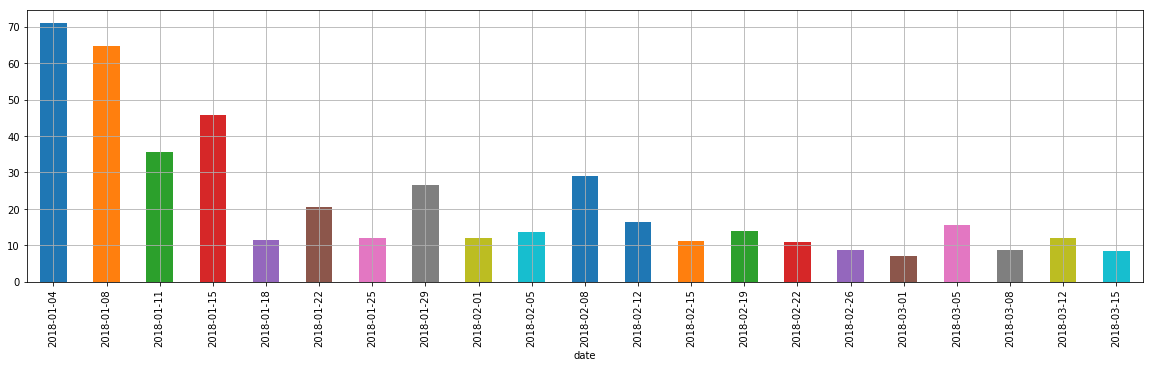

In [71]:
JobWiseMins['AALTransLoad'].plot(kind='bar',figsize=(20,5))
plt.grid()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

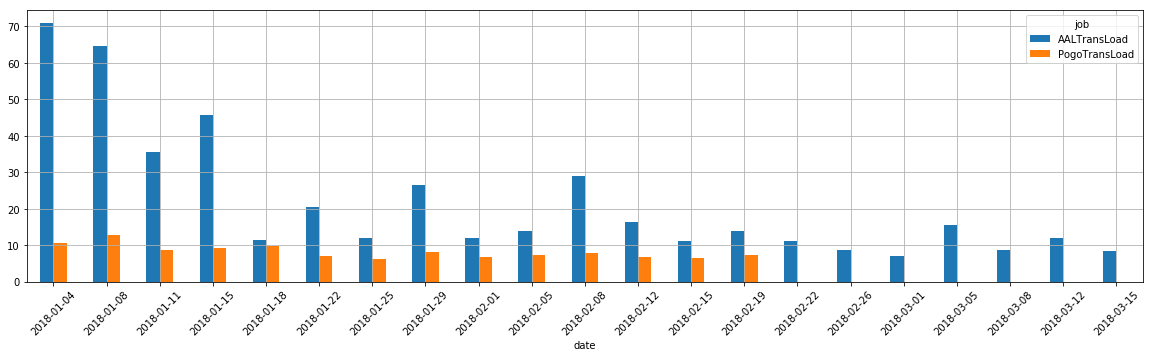

In [74]:
JobWiseMins[['AALTransLoad','PogoTransLoad']].plot(kind='bar',figsize=(20,5))
plt.grid()
plt.xticks(rotation=45)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000304889B0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000000307C1198>], dtype=object)

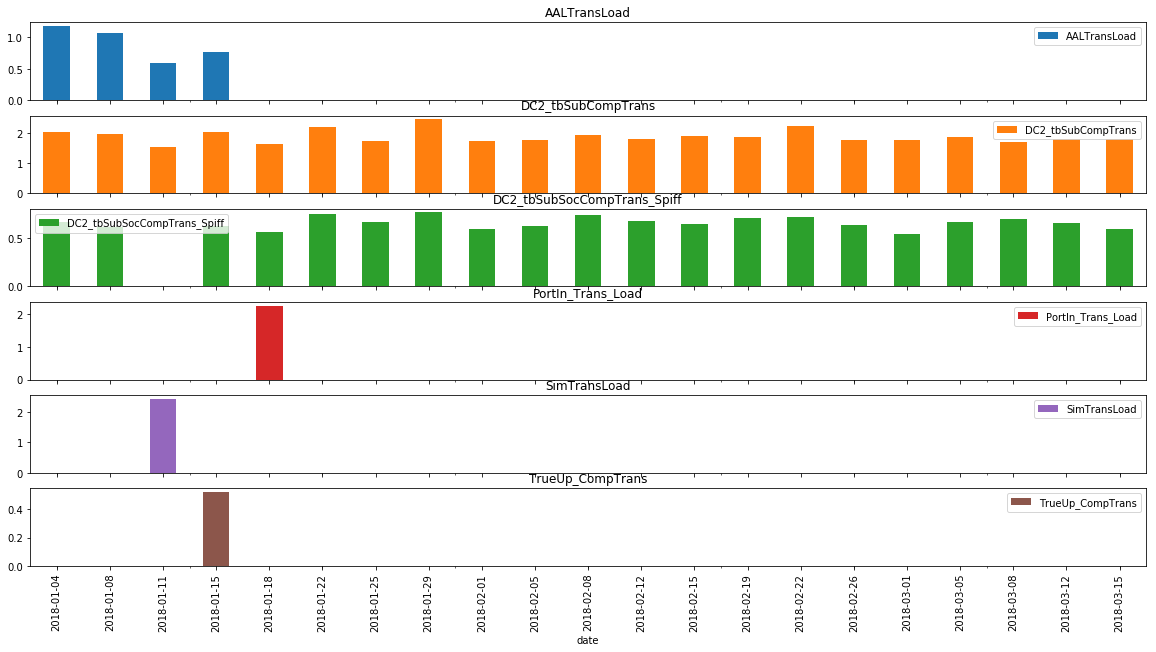

In [84]:
SubsetLoadTimes[SubsetLoadTimes.hours>.5].pivot(index='date',columns='job',values='hours').plot(kind='bar',figsize=(20,10),subplots=True)

In [95]:
SubsetLoadTimes[(SubsetLoadTimes.hours>=.5) & ( SubsetLoadTimes.date.astype('datetime64[ns]')>='2018-02-01')]


,H,M,S,mins,hours,job,starttime,date
92,1,44,35,104.583333,1.743056,DC2_tbSubCompTrans,2018-02-01 03:40:49,2018-02-01
93,1,46,41,106.683333,1.778056,DC2_tbSubCompTrans,2018-02-05 03:26:01,2018-02-05
94,1,56,20,116.333333,1.938889,DC2_tbSubCompTrans,2018-02-08 03:26:49,2018-02-08
95,1,47,19,107.316667,1.788611,DC2_tbSubCompTrans,2018-02-12 03:04:48,2018-02-12
96,1,53,46,113.766667,1.896111,DC2_tbSubCompTrans,2018-02-15 03:25:26,2018-02-15
97,1,52,32,112.533333,1.875556,DC2_tbSubCompTrans,2018-02-19 03:01:39,2018-02-19
98,2,14,19,134.316667,2.238611,DC2_tbSubCompTrans,2018-02-22 03:01:44,2018-02-22
99,1,46,50,106.833333,1.780556,DC2_tbSubCompTrans,2018-02-26 03:27:34,2018-02-26
100,1,45,16,105.266667,1.754444,DC2_tbSubCompTrans,2018-03-01 03:52:03,2018-03-01
101,1,51,49,111.816667,1.863611,DC2_tbSubCompTrans,2018-03-05 03:01:42,2018-03-05


In [94]:
TIME[(TIME.Hours>=0.5 )& (TIME.date.astype('datetime64[ns]')>='2018-03-01')]

,A,B,C,mins,process,date,Hours
100,1,45,16,105.266667,DC2_tbSubCompTrans,2018-03-01,1.754444
101,1,51,49,111.816667,DC2_tbSubCompTrans,2018-03-05,1.863611
102,1,41,34,101.566667,DC2_tbSubCompTrans,2018-03-08,1.692778
103,1,48,54,108.900000,DC2_tbSubCompTrans,2018-03-12,1.815000
104,1,47,30,107.500000,DC2_tbSubCompTrans,2018-03-15,1.791667
163,0,32,36,32.600000,DC2_tbSubSocCompTrans_Spiff,2018-03-01,0.543333
164,0,39,55,39.916667,DC2_tbSubSocCompTrans_Spiff,2018-03-05,0.665278
165,0,41,39,41.650000,DC2_tbSubSocCompTrans_Spiff,2018-03-08,0.694167
166,0,39,30,39.500000,DC2_tbSubSocCompTrans_Spiff,2018-03-12,0.658333
167,0,35,58,35.966667,DC2_tbSubSocCompTrans_Spiff,2018-03-15,0.599444


In [96]:
SubsetLoadTimes

,H,M,S,mins,hours,job,starttime,date
0,1,10,58,70.966667,1.182778,AALTransLoad,2018-01-04 10:04:49,2018-01-04
1,1,4,33,64.550000,1.075833,AALTransLoad,2018-01-08 07:39:24,2018-01-08
2,0,35,32,35.533333,0.592222,AALTransLoad,2018-01-11 06:56:56,2018-01-11
3,0,45,50,45.833333,0.763889,AALTransLoad,2018-01-15 08:51:19,2018-01-15
4,0,11,26,11.433333,0.190556,AALTransLoad,2018-01-18 15:48:34,2018-01-18
5,0,20,33,20.550000,0.342500,AALTransLoad,2018-01-22 08:00:49,2018-01-22
6,0,11,59,11.983333,0.199722,AALTransLoad,2018-01-25 13:20:29,2018-01-25
7,0,26,38,26.633333,0.443889,AALTransLoad,2018-01-29 08:15:58,2018-01-29
8,0,12,4,12.066667,0.201111,AALTransLoad,2018-02-01 07:38:46,2018-02-01
9,0,13,48,13.800000,0.230000,AALTransLoad,2018-02-05 07:22:42,2018-02-05


In [199]:
pd.DatetimeIndex(SubsetLoadTimes['starttime']).minute

Int64Index([ 4, 39, 56, 51, 48,  0, 20, 15, 38, 22,
            ...
            23, 33, 24, 28, 30, 30, 49,  2, 20, 26],
           dtype='int64', name=u'starttime', length=505)

In [98]:
SubsetLoadTimes['starttimehrs']=pd.DatetimeIndex(SubsetLoadTimes['starttime']).hour

In [99]:
SubsetLoadTimes

,H,M,S,mins,hours,job,starttime,date,starttimehrs
0,1,10,58,70.966667,1.182778,AALTransLoad,2018-01-04 10:04:49,2018-01-04,10
1,1,4,33,64.550000,1.075833,AALTransLoad,2018-01-08 07:39:24,2018-01-08,7
2,0,35,32,35.533333,0.592222,AALTransLoad,2018-01-11 06:56:56,2018-01-11,6
3,0,45,50,45.833333,0.763889,AALTransLoad,2018-01-15 08:51:19,2018-01-15,8
4,0,11,26,11.433333,0.190556,AALTransLoad,2018-01-18 15:48:34,2018-01-18,15
5,0,20,33,20.550000,0.342500,AALTransLoad,2018-01-22 08:00:49,2018-01-22,8
6,0,11,59,11.983333,0.199722,AALTransLoad,2018-01-25 13:20:29,2018-01-25,13
7,0,26,38,26.633333,0.443889,AALTransLoad,2018-01-29 08:15:58,2018-01-29,8
8,0,12,4,12.066667,0.201111,AALTransLoad,2018-02-01 07:38:46,2018-02-01,7
9,0,13,48,13.800000,0.230000,AALTransLoad,2018-02-05 07:22:42,2018-02-05,7


In [101]:
SubsetLoadTimes.dtypes
SubsetLoadTimes['starttime']=SubsetLoadTimes['starttime'].astype('datetime64[ns]')

In [102]:
SubsetLoadTimes.dtypes

H                        int32
M                        int32
S                        int32
mins                   float64
hours                  float64
job                     object
starttime       datetime64[ns]
date                    object
starttimehrs             int64
dtype: object

In [104]:
list(SubsetLoadTimes.job.unique())

[u'AALTransLoad',
 u'BOHOTransLoad',
 u'BalanceTransfer_Finance',
 u'BogoTransLoad',
 u'DC2_tbSubCompTrans',
 u'DC2_tbSubCompTrans_Stage',
 u'DC2_tbSubSocCompTrans',
 u'DC2_tbSubSocCompTrans_Spiff',
 u'Load_Financial_Transaction_Extract',
 u'PogoTransLoad',
 u'PortInTransTrueupLoad',
 u'PortIn_Trans_Load',
 u'PriceProtectionTrans',
 u'QipTrans',
 u'RebateTransLoad',
 u'RebateTransTrueUpLoad',
 u'Retail_Associate_Transaction',
 u'SCRebateTransLoad',
 u'SCRebateTransTrueupLoad',
 u'SimTransLoad',
 u'SubCompTrans_Dup_Notification',
 u'TrueUp_CompTrans',
 u'm_DealerTransactions',
 u'm_Kicker_Chgback_Trans',
 u'm_Sim_trans']

In [105]:
RebateJobs=['AALTransLoad',
 'BOHOTransLoad',
 'BogoTransLoad',
 'PogoTransLoad',
 'PortInTransTrueupLoad',
 'PortIn_Trans_Load',
 'PriceProtectionTrans',
 'QipTrans',
 'RebateTransLoad',
 'RebateTransTrueUpLoad',
 'SCRebateTransLoad',
 'SCRebateTransTrueupLoad',
 'SimTransLoad',
 'TrueUp_CompTrans',
 'm_Kicker_Chgback_Trans',
 'm_Sim_trans']

In [107]:
SubsetLoadTimes['type']=np.where(SubsetLoadTimes['job'].isin( RebateJobs),'REBATE','OTHERS')

In [108]:
SubsetLoadTimes

,H,M,S,mins,hours,job,starttime,date,starttimehrs,type
0,1,10,58,70.966667,1.182778,AALTransLoad,2018-01-04 10:04:49,2018-01-04,10,REBATE
1,1,4,33,64.550000,1.075833,AALTransLoad,2018-01-08 07:39:24,2018-01-08,7,REBATE
2,0,35,32,35.533333,0.592222,AALTransLoad,2018-01-11 06:56:56,2018-01-11,6,REBATE
3,0,45,50,45.833333,0.763889,AALTransLoad,2018-01-15 08:51:19,2018-01-15,8,REBATE
4,0,11,26,11.433333,0.190556,AALTransLoad,2018-01-18 15:48:34,2018-01-18,15,REBATE
5,0,20,33,20.550000,0.342500,AALTransLoad,2018-01-22 08:00:49,2018-01-22,8,REBATE
6,0,11,59,11.983333,0.199722,AALTransLoad,2018-01-25 13:20:29,2018-01-25,13,REBATE
7,0,26,38,26.633333,0.443889,AALTransLoad,2018-01-29 08:15:58,2018-01-29,8,REBATE
8,0,12,4,12.066667,0.201111,AALTransLoad,2018-02-01 07:38:46,2018-02-01,7,REBATE
9,0,13,48,13.800000,0.230000,AALTransLoad,2018-02-05 07:22:42,2018-02-05,7,REBATE


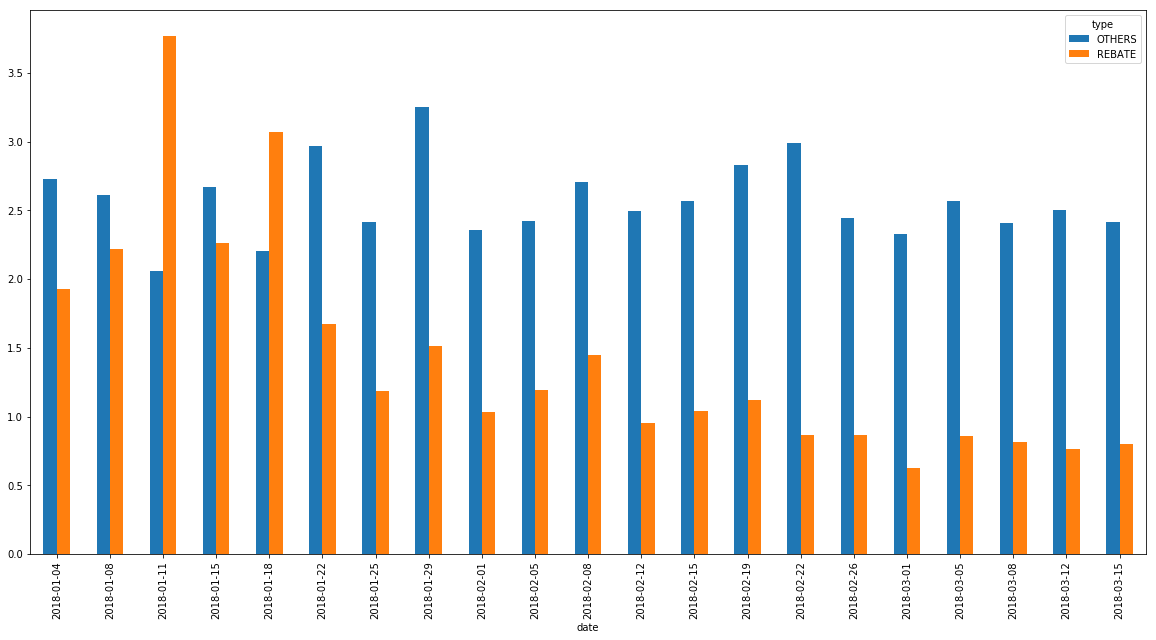

In [112]:
pd.pivot_table(SubsetLoadTimes,index='date',columns='type',values='hours',aggfunc=np.sum).plot(kind='bar',figsize=(20,10))

In [114]:
pd.pivot_table(SubsetLoadTimes, index=["date"], columns=["type"], values=["hours"], aggfunc=np.sum)

hours          
type          OTHERS    REBATE
date                          
2018-01-04  2.730833  1.925833
2018-01-08  2.610833  2.222222
2018-01-11  2.057222  3.767778
2018-01-15  2.669722  2.265833
2018-01-18  2.206944  3.068889
2018-01-22  2.970833  1.671944
2018-01-25  2.414722  1.188333
2018-01-29  3.250000  1.515000
2018-02-01  2.353889  1.030556
2018-02-05  2.425278  1.190278
2018-02-08  2.709167  1.446667
2018-02-12  2.496389  0.950833
2018-02-15  2.566944  1.040556
2018-02-19  2.831389  1.117500
2018-02-22  2.992222  0.862778
2018-02-26  2.444722  0.864722
2018-03-01  2.331111  0.623333
2018-03-05  2.566944  0.856389
2018-03-08  2.410833  0.811944
2018-03-12  2.505833  0.765278
2018-03-15  2.418889  0.799167

In [115]:
rebateNothers=pd.pivot_table(SubsetLoadTimes, index=["date"], columns=["type"], values=["hours"], aggfunc=np.sum)

In [116]:
rebateNothers.head()

hours          
type          OTHERS    REBATE
date                          
2018-01-04  2.730833  1.925833
2018-01-08  2.610833  2.222222
2018-01-11  2.057222  3.767778
2018-01-15  2.669722  2.265833
2018-01-18  2.206944  3.068889

In [117]:
rebateNothers.columns=rebateNothers.columns.droplevel(0)

In [119]:
rebateNothers.columns.name=None

In [130]:
rebateNothers=rebateNothers.reset_index()

In [131]:
rebateNothers

,date,OTHERS,REBATE
0,2018-01-04,2.730833,1.925833
1,2018-01-08,2.610833,2.222222
2,2018-01-11,2.057222,3.767778
3,2018-01-15,2.669722,2.265833
4,2018-01-18,2.206944,3.068889
5,2018-01-22,2.970833,1.671944
6,2018-01-25,2.414722,1.188333
7,2018-01-29,3.250000,1.515000
8,2018-02-01,2.353889,1.030556
9,2018-02-05,2.425278,1.190278


In [126]:
rebateNothers.set_index('date',inplace=True)

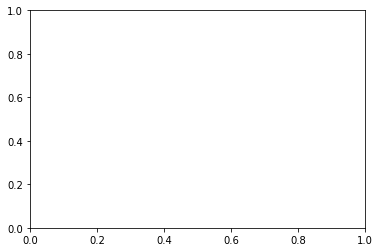

In [129]:
f,ax=plt.subplots()

In [136]:
%matplotlib inline


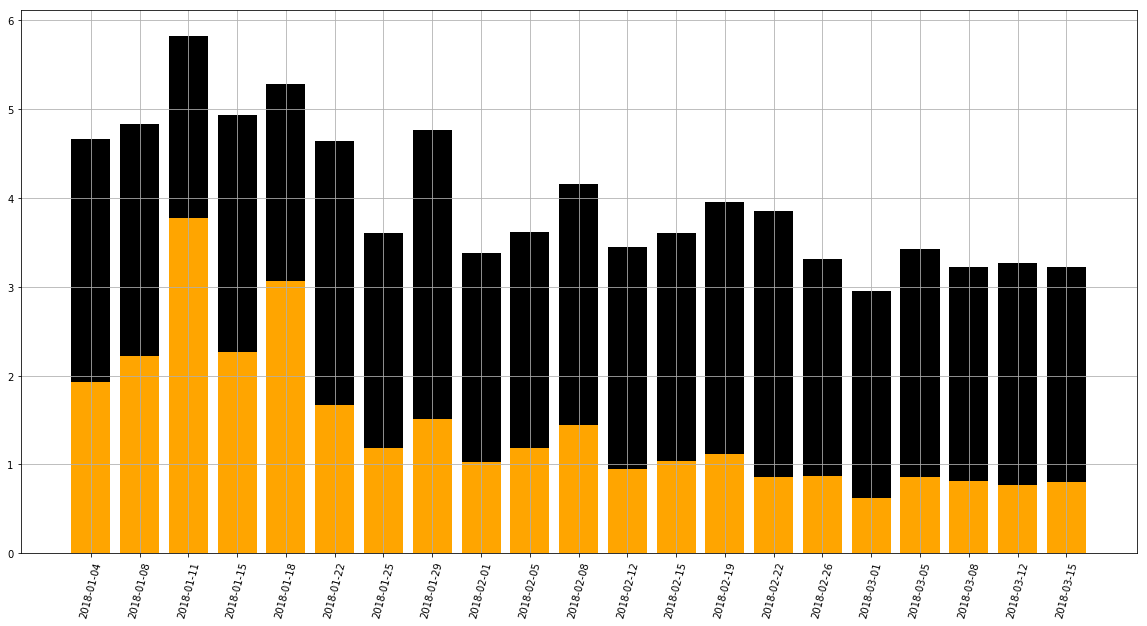

In [151]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=75)
plt.bar(rebateNothers['date'],rebateNothers['REBATE'],color='orange')
plt.bar(rebateNothers['date'],rebateNothers['OTHERS'],bottom=rebateNothers['REBATE'],color='black')
plt.grid()




In [196]:
SubsetLoadTimes.groupby(['job','starttimehrs']).date.count()

job                            starttimehrs
AALTransLoad                   6                1
                               7               11
                               8                4
                               10               2
                               13               1
                               15               1
                               19               1
BOHOTransLoad                  6               11
                               7                8
                               8                1
                               9                1
BalanceTransfer_Finance        3               17
                               4                3
                               6                1
BogoTransLoad                  6                2
                               7               12
                               8                3
                               9                1
                               10               1
      

In [183]:
SubsetLoadTimes.groupby(['job','starttimehrs']).hours.agg(['mean'])

mean
job                           starttimehrs          
AALTransLoad                  6             0.592222
                              7             0.278561
                              8             0.423958
                              10            0.833333
                              13            0.199722
                              15            0.190556
                              19            0.184444
BOHOTransLoad                 6             0.000227
                              7             0.000521
                              8             0.000278
                              9             0.005833
BalanceTransfer_Finance       3             0.000801
                              4             0.000741
                              6             0.000556
BogoTransLoad                 6             0.000139
                              7             0.000116
                              8             0.000093
                              9             0.000278
                              10            0.000000
                              13            0.000278
                              15            0.000000
DC2_tbSubCompTrans            3             1.884737
                              4             1.692778
                              5             2.030000
DC2_tbSubCompTrans_Stage      3             0.002003
                              4             0.002222
                              5             0.003889
DC2_tbSubSocCompTrans         2             0.003333
                              3             0.004118
                              4             0.004167
...                                              ...
Retail_Associate_Transaction  5             0.003819
                              6             0.001389
SCRebateTransLoad             6             0.129333
                              7             0.174097
                              8             0.000000
                              9             0.000278
                              17            0.272222
SCRebateTransTrueupLoad       6             0.000104
                              7             0.000152
                              8             0.000278
                              9             0.000278
SimTransLoad                  6             0.300934
                              7             0.122917
                              8             0.314444
                              9             0.022222
SubCompTrans_Dup_Notification 4             0.000694
                              5             0.000630
                              6             0.000833
                              7             0.000556
TrueUp_CompTrans              6             0.052828
                              7             0.036042
                              8             0.520556
                              9             0.123056
m_DealerTransactions          2             0.009074
m_Kicker_Chgback_Trans        6             0.017917
                              7             0.009861
                              9             0.006944
m_Sim_trans                   0             0.003580
                              2             0.002361
                              14            0.006944

[103 rows x 1 columns]

In [162]:
starttimehrsm=SubsetLoadTimes.groupby(['job','starttimehrs']).hours.agg(['mean'])

In [184]:
starttimehrsm

,job,starttimehrs,mean
0,AALTransLoad,6,0.592222
1,AALTransLoad,7,0.278561
2,AALTransLoad,8,0.423958
3,AALTransLoad,10,0.833333
4,AALTransLoad,13,0.199722
5,AALTransLoad,15,0.190556
6,AALTransLoad,19,0.184444
7,BOHOTransLoad,6,0.000227
8,BOHOTransLoad,7,0.000521
9,BOHOTransLoad,8,0.000278


In [171]:
starttimehrsm.reset_index(inplace=True)

In [185]:
starttimehrsm[starttimehrsm.job=='DC2_tbSubCompTrans']

,job,starttimehrs,mean
21,DC2_tbSubCompTrans,3,1.884737
22,DC2_tbSubCompTrans,4,1.692778
23,DC2_tbSubCompTrans,5,2.030000


In [194]:
starttimehrsm.groupby(['starttimehrs','job']).count()

mean
starttimehrs job                                     
0            m_Sim_trans                            1
2            DC2_tbSubSocCompTrans                  1
             m_DealerTransactions                   1
             m_Sim_trans                            1
3            BalanceTransfer_Finance                1
             DC2_tbSubCompTrans                     1
             DC2_tbSubCompTrans_Stage               1
             DC2_tbSubSocCompTrans                  1
4            BalanceTransfer_Finance                1
             DC2_tbSubCompTrans                     1
             DC2_tbSubCompTrans_Stage               1
             DC2_tbSubSocCompTrans                  1
             DC2_tbSubSocCompTrans_Spiff            1
             Load_Financial_Transaction_Extract     1
             Retail_Associate_Transaction           1
             SubCompTrans_Dup_Notification          1
5            DC2_tbSubCompTrans                     1
             DC2_tbSubCompTrans_Stage               1
             DC2_tbSubSocCompTrans                  1
             DC2_tbSubSocCompTrans_Spiff            1
             Load_Financial_Transaction_Extract     1
             Retail_Associate_Transaction           1
             SubCompTrans_Dup_Notification          1
6            AALTransLoad                           1
             BOHOTransLoad                          1
             BalanceTransfer_Finance                1
             BogoTransLoad                          1
             DC2_tbSubSocCompTrans_Spiff            1
             PogoTransLoad                          1
             PortInTransTrueupLoad                  1
...                                               ...
9            PogoTransLoad                          1
             PortInTransTrueupLoad                  1
             PortIn_Trans_Load                      1
             PriceProtectionTrans                   1
             RebateTransLoad                        1
             RebateTransTrueUpLoad                  1
             SCRebateTransLoad                      1
             SCRebateTransTrueupLoad                1
             SimTransLoad                           1
             TrueUp_CompTrans                       1
             m_Kicker_Chgback_Trans                 1
10           AALTransLoad                           1
             BogoTransLoad                          1
             Load_Financial_Transaction_Extract     1
             PogoTransLoad                          1
12           Load_Financial_Transaction_Extract     1
             PortIn_Trans_Load                      1
             RebateTransLoad                        1
13           AALTransLoad                           1
             BogoTransLoad                          1
             PogoTransLoad                          1
             PortInTransTrueupLoad                  1
             RebateTransTrueUpLoad                  1
14           m_Sim_trans                            1
15           AALTransLoad                           1
             BogoTransLoad                          1
             PogoTransLoad                          1
             RebateTransTrueUpLoad                  1
17           SCRebateTransLoad                      1
19           AALTransLoad                           1

[103 rows x 1 columns]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000040E6EE48>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000042601908>], dtype=object)

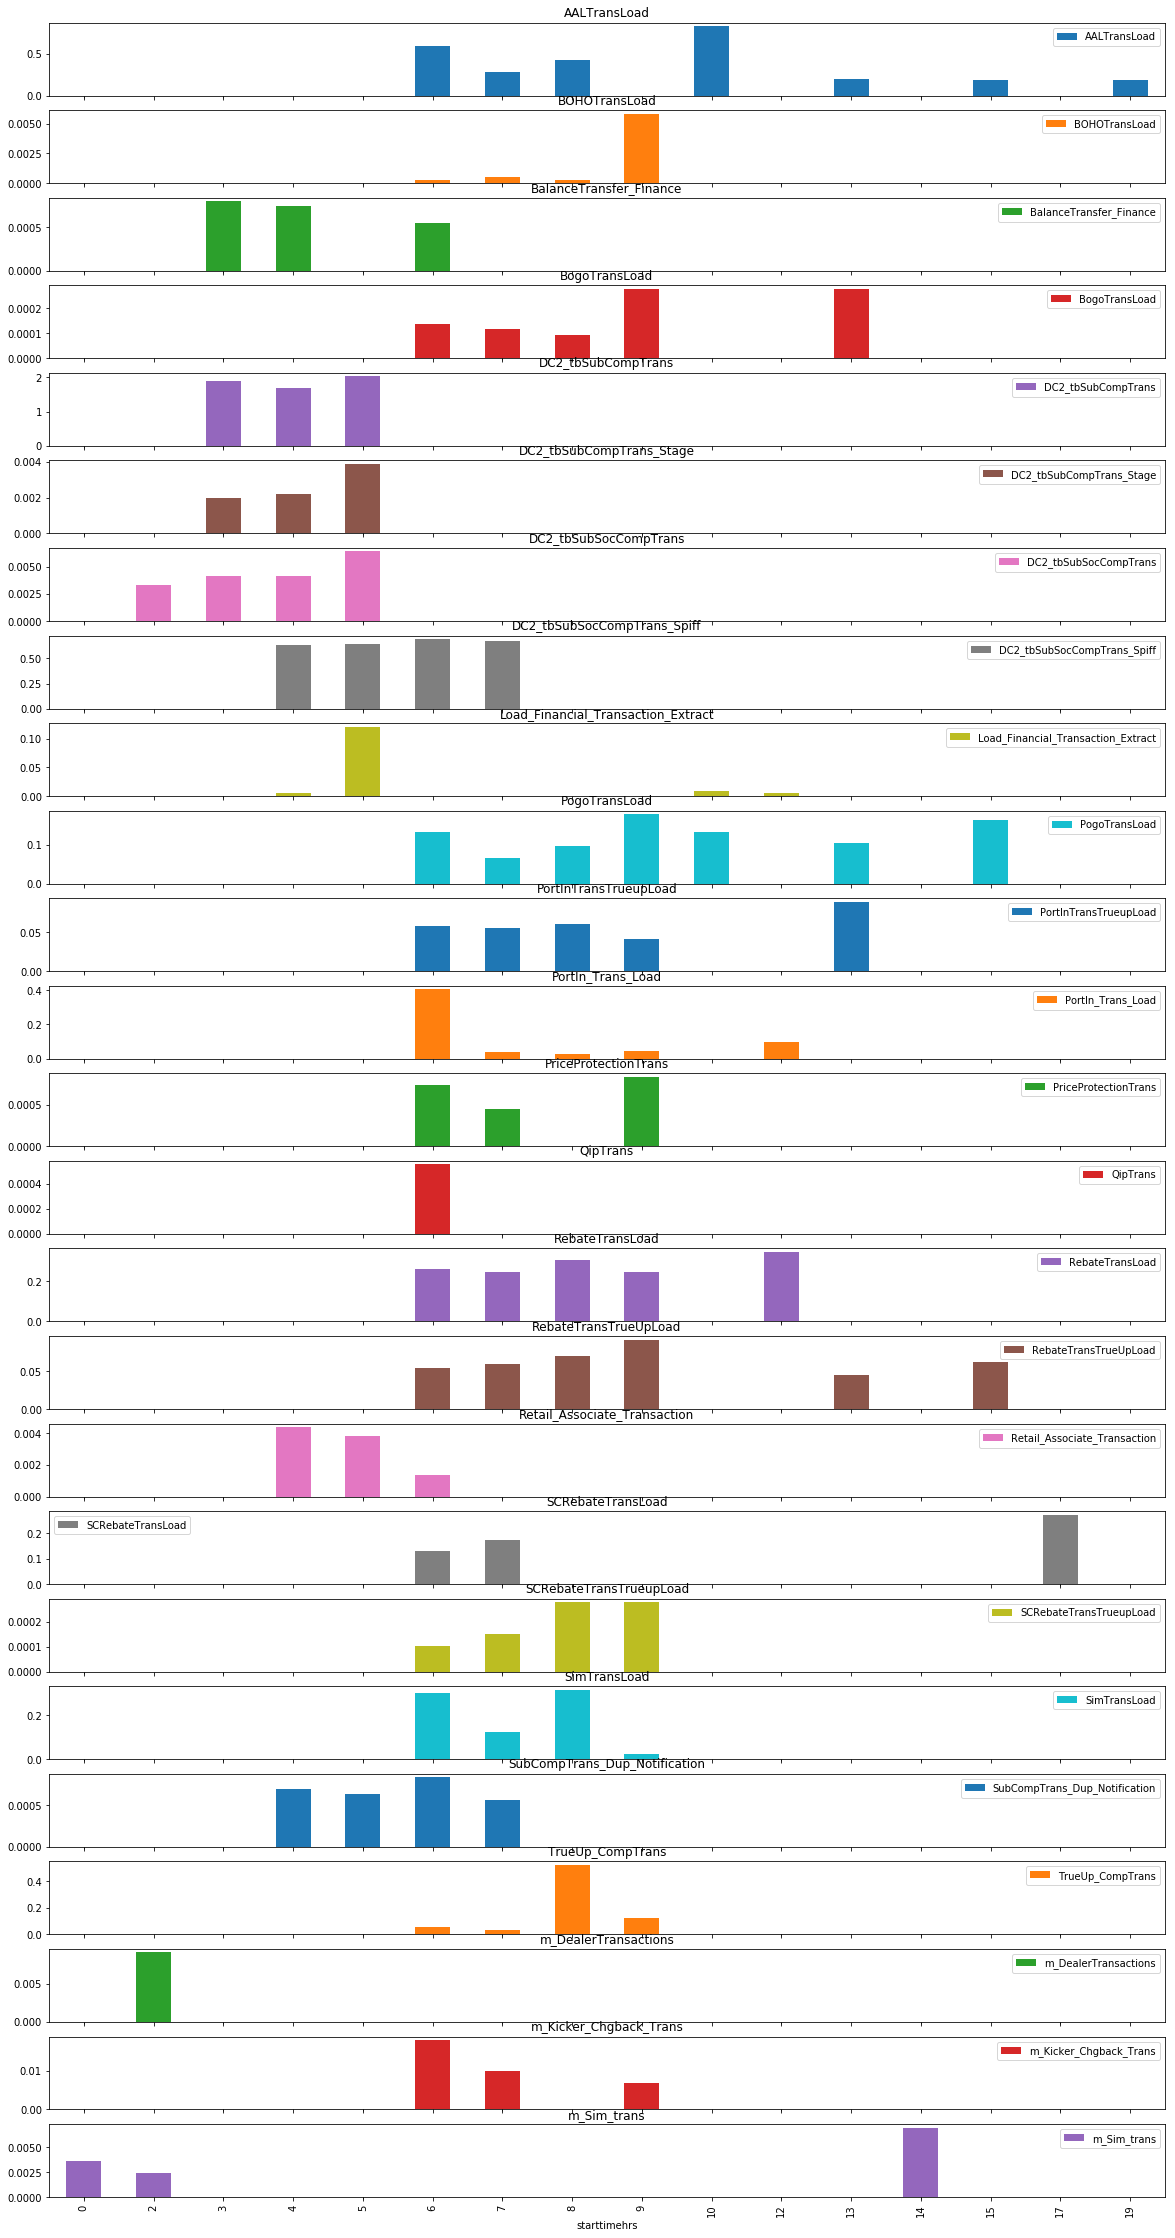

In [178]:
starttimehrsm.pivot(index='starttimehrs',columns='job',values='mean').plot(kind='bar',figsize=(20,40),subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000004613D898>], dtype=object)

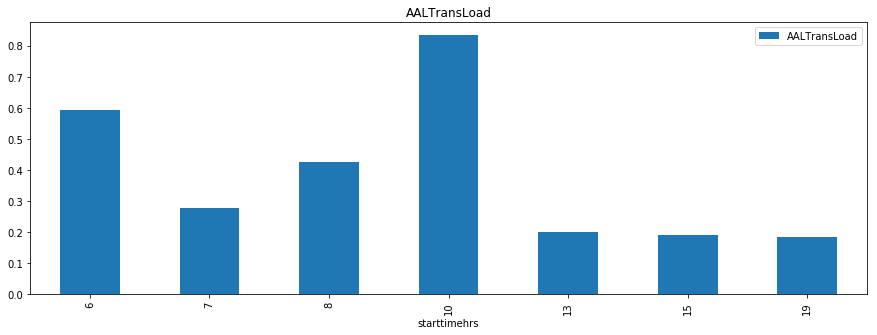

In [200]:
starttimehrsm[starttimehrsm.job=='AALTransLoad'].pivot(index='starttimehrs',columns='job',values='mean').plot(kind='bar',figsize=(15,5),subplots=True)

In [190]:
LoadTimes.groupby('PROCESS').RUN_DATE.count()

PROCESS
AALTransLoad                          21
BOHOTransLoad                         21
BalanceTransfer_Finance               21
BogoTransLoad                         21
DC2_tbSubCompTrans                    21
DC2_tbSubCompTrans_Stage              21
DC2_tbSubSocCompTrans                 21
DC2_tbSubSocCompTrans_Spiff           21
Load_Financial_Transaction_Extract    21
PogoTransLoad                         21
PortInTransTrueupLoad                 21
PortIn_Trans_Load                     21
PriceProtectionTrans                  21
QipTrans                               1
RebateTransLoad                       21
RebateTransTrueUpLoad                 21
Retail_Associate_Transaction          21
SCRebateTransLoad                     21
SCRebateTransTrueupLoad               21
SimTransLoad                          21
SubCompTrans_Dup_Notification         21
TrueUp_CompTrans                      21
m_DealerTransactions                  21
m_Kicker_Chgback_Trans                21
m_Sim_tr